In [18]:
import math,random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import operator

# Reading dataset

In [19]:
dataset = pd.read_csv('datasets/heart.csv',header=None)
data=dataset.iloc[1:,:13]
target = dataset.iloc[1:,-1:]
data.values.tolist()
target.values.tolist()

[['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],
 ['1'],


In [20]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
target
#endregion

,13
1,1
2,1
3,1
4,1
5,1
...,...
299,0
300,0
301,0
302,0


# Normalize data

In [22]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled

array([[0.19745405, 0.00313419, 0.00940257, ..., 0.        , 0.        ,
        0.00313419],
       [0.10874818, 0.00293914, 0.00587828, ..., 0.        , 0.        ,
        0.00587828],
       [0.1368249 , 0.        , 0.00333719, ..., 0.00667439, 0.        ,
        0.00667439],
       ...,
       [0.23671899, 0.00348116, 0.        , ..., 0.00348116, 0.00696232,
        0.01044348],
       [0.25352009, 0.00444772, 0.        , ..., 0.00444772, 0.00444772,
        0.01334316],
       [0.1749685 , 0.        , 0.00306962, ..., 0.00306962, 0.00306962,
        0.00613925]])

# Split training data from test data

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data, test_size=0.2)
y_train, y_test = train_test_split(target, test_size=0.2)

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
array_hasil=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    #masukan prediksi
    pred=knn.predict(x_test)
    #nilaiPrediksi
    hasil=accuracy_score(y_test, pred)
    array_hasil.append(hasil)

/home/durianpeople/Binaries/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/durianpeople/Binaries/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/durianpeople/Binaries/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/durianpeople/Binaries/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


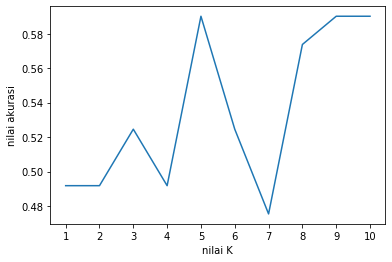

In [37]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(array_hasil)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai K')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()